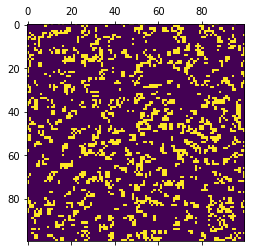

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

N = 100
ON = 255
OFF = 0
vals = [ON, OFF]

# populate grid with random on/off - more off than on
grid = np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)

def update(data):
  global grid
  # copy grid since we require 8 neighbors for calculation
  # and we go line by line 
  newGrid = grid.copy()
  for i in range(N):
    for j in range(N):
      # compute 8-neghbor sum 
      # using toroidal boundary conditions - x and y wrap around 
      # so that the simulaton takes place on a toroidal surface.
      total = (grid[i, (j-1)%N] + grid[i, (j+1)%N] + 
               grid[(i-1)%N, j] + grid[(i+1)%N, j] + 
               grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] + 
               grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255
      # apply Conway's rules
      if grid[i, j]  == ON:
        if (total < 2) or (total > 3):
          newGrid[i, j] = OFF
      else:
        if total == 3:
          newGrid[i, j] = ON
  # update data
  mat.set_data(newGrid)
  grid = newGrid
  return [mat]

# set up animation
fig, ax = plt.subplots()
mat = ax.matshow(grid)
ani = animation.FuncAnimation(fig, update, interval=50,
                              save_count=50)
plt.show()